In [1]:
#needs version >= 1.5 for full functionality
import tequila as tq

In [2]:
#Initialize molecule
import tequila as tq
geomstring="C 0.0 0.0 0.0\nO 0.0 0.0 1.16\nO 0.0 0.0 -1.16"
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ")
print(molecule)

<class 'tequila.quantumchemistry.psi4_interface.QuantumChemistryPsi4'>
Qubit Encoding
JordanWigner

Parameters
basis_set       : cc-pVDZ         
geometry        : C 0.0 0.0 0.0
O 0.0 0.0 1.16
O 0.0 0.0 -1.16 
description     :                 
multiplicity    : 1               
charge          : 0               
name            : o2c             
frozen_core     : True            
n_qubits        : 78              
reference state : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

Basis

IntegralManager:
ActiveSpace:
Active Space Data:
active_orbitals : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41] 
reference_orbitals : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
active_reference_orbitals : [3, 4, 5, 6, 7,

In [3]:
#Molecular Orbitals and Point Groups
molecule.orbitals[3]

OrbitalData(irrep='B1U', idx_irrep=2, idx_total=6, idx=3, energy=-0.7369160976714202, occ=None, pair=None)

In [4]:
#Since, the CO2 Hamiltonian is very large, so let's set the active space and then initialize the Qubit Hamiltonian
import tequila as tq
import numpy
active_orbitals = {"AG":[0,1,2], "B1G":[0,1]}
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ", active_orbitals=active_orbitals)
H = molecule.make_hamiltonian()
eigenValues = numpy.linalg.eigvalsh(H.to_matrix())
print("Hamiltonian has {} terms".format(len(H)))
print(H)
print(eigenValues)
print("lowest energy = ", eigenValues[0])

Hamiltonian has 62 terms
-181.9923+0.4428Z(0)+0.4428Z(1)-0.7266Z(2)+0.0048Y(2)Z(3)Y(4)+0.0048X(2)Z(3)X(4)-0.7266Z(3)+0.0048Y(3)Z(4)Y(5)+0.0048X(3)Z(4)X(5)-1.5898Z(4)-1.5898Z(5)+0.1398Z(0)Z(1)+0.0048Y(0)X(1)X(2)Y(3)-0.0048Y(0)Y(1)X(2)X(3)-0.0048X(0)X(1)Y(2)Y(3)+0.0048X(0)Y(1)Y(2)X(3)+0.0015Y(0)X(1)X(3)Y(4)+0.0015Y(0)Y(1)Y(3)Y(4)+0.0015X(0)X(1)X(3)X(4)+0.0015X(0)Y(1)Y(3)X(4)-0.0015Y(0)X(1)X(2)Z(3)Z(4)Y(5)+0.0015Y(0)Y(1)X(2)Z(3)Z(4)X(5)+0.0015X(0)X(1)Y(2)Z(3)Z(4)Y(5)-0.0015X(0)Y(1)Y(2)Z(3)Z(4)X(5)+0.0060Y(0)X(1)X(4)Y(5)-0.0060Y(0)Y(1)X(4)X(5)-0.0060X(0)X(1)Y(4)Y(5)+0.0060X(0)Y(1)Y(4)X(5)+0.1116Z(0)Z(2)+0.0007Z(0)Y(2)Z(3)Y(4)+0.0007Z(0)X(2)Z(3)X(4)+0.1164Z(0)Z(3)+0.0022Z(0)Y(3)Z(4)Y(5)+0.0022Z(0)X(3)Z(4)X(5)+0.1140Z(0)Z(4)+0.1199Z(0)Z(5)+0.1164Z(1)Z(2)+0.0022Z(1)Y(2)Z(3)Y(4)+0.0022Z(1)X(2)Z(3)X(4)+0.1116Z(1)Z(3)+0.0007Z(1)Y(3)Z(4)Y(5)+0.0007Z(1)X(3)Z(4)X(5)+0.1199Z(1)Z(4)+0.1140Z(1)Z(5)+0.1395Z(2)Z(3)-0.0095Y(2)Y(4)-0.0095X(2)X(4)-0.0095Z(2)Y(3)Z(4)Y(5)-0.0095Z(2)X(3)Z(4)X(5)+0.0042Y(2)X(3

In [5]:
import tequila as tq
threshold = 1.e-6
active = {"AG":[0,1,2], "B1G":[0,1]}
molecule = tq.quantumchemistry.Molecule(geometry=geomstring, basis_set='cc-pVDZ', active_orbitals=active)
H = molecule.make_hamiltonian()

U = molecule.make_upccgsd_ansatz(name="UpCCGD")

# define the expectationvalue
E = tq.ExpectationValue(H=H, U=U)

# compute reference energies
mp2 = molecule.compute_energy("mp2")
cisd = molecule.compute_energy("detci", options={"detci__ex_level": 2})
fci = molecule.compute_energy("fci")

# optimize
result = tq.minimize(objective=E, method="BFGS", initial_values=0.0)

print("VQE : {:+2.8}f".format(result.energy))
print("MP2 : {:+2.8}f".format(mp2))
print("CISD: {:+2.8}f".format(cisd))
print("FCI : {:+2.8}f".format(fci))

There are known issues with some psi4 methods and frozen virtual orbitals. Proceed with fingers crossed for mp2.
Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 6 expectationvalues

active variables : 3

E=-187.65110739  angles= {(((0, 1),), 'D', (None, 0)): 0.0, (((0, 2),), 'D', (None, 0)): 0.0, (((1, 2),), 'D', (None, 0)): 0.0}  samples= None
E=-187.65041355  angles= {(((0, 1),), 'D', (None, 0)): -0.01910400390625, (((0, 2),), 'D', (None, 0)): -0.02387237548828125, (((1, 2),), 'D', (None, 0)): 0.0}  samples= None
E=-187.65124156  angles= {(((0, 1),), 'D', (None, 0)): -0.00548214011739437, (((0, 2),), 'D', (None, 0)): -0.006850485793660936, (((1, 2),), 'D', (None, 0)): 0.0}  samples= None
E=-187.65121769  angles= {(((0, 1),), 'D', (None, 0)): -0.012290246024470784, ((

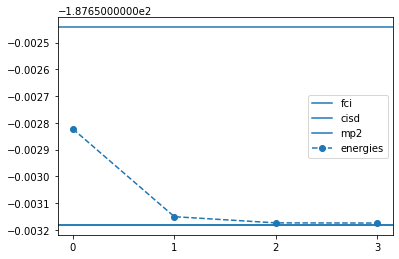

In [12]:
result.history.plot("energies", baselines={"fci":fci, "cisd": cisd, "mp2":mp2}, filename="CO2_result_bfgs")

In [7]:
#Setting larger Active Space than the previous one
import tequila as tq
import numpy
active_orbitals = {"AG":[0,1,2], "B1G":[0,1], "B2G":[0,1]}
molecule = tq.chemistry.Molecule(geometry = geomstring, basis_set="cc-pVDZ", active_orbitals=active_orbitals)
H = molecule.make_hamiltonian()
eigenValues = numpy.linalg.eigvalsh(H.to_matrix())
print("Hamiltonian has {} terms".format(len(H)))
print(H)
print(eigenValues)
print("lowest energy = ", eigenValues[0])

Hamiltonian has 252 terms
-180.5446+0.4801Z(0)+0.4801Z(1)+0.0182Z(2)+0.0052Y(2)Z(3)Y(4)+0.0052X(2)Z(3)X(4)+0.0182Z(3)+0.0052Y(3)Z(4)Y(5)+0.0052X(3)Z(4)X(5)-0.6270Z(4)-0.6270Z(5)-0.7004Z(6)+0.0070Y(6)Z(7)Y(8)+0.0070X(6)Z(7)X(8)-0.7004Z(7)+0.0070Y(7)Z(8)Y(9)+0.0070X(7)Z(8)X(9)-1.5516Z(8)-1.5516Z(9)+0.1398Z(0)Z(1)+0.0141Y(0)X(1)X(2)Y(3)-0.0141Y(0)Y(1)X(2)X(3)-0.0141X(0)X(1)Y(2)Y(3)+0.0141X(0)Y(1)Y(2)X(3)-0.0053Y(0)X(1)X(3)Y(4)-0.0053Y(0)Y(1)Y(3)Y(4)-0.0053X(0)X(1)X(3)X(4)-0.0053X(0)Y(1)Y(3)X(4)+0.0053Y(0)X(1)X(2)Z(3)Z(4)Y(5)-0.0053Y(0)Y(1)X(2)Z(3)Z(4)X(5)-0.0053X(0)X(1)Y(2)Z(3)Z(4)Y(5)+0.0053X(0)Y(1)Y(2)Z(3)Z(4)X(5)+0.0039Y(0)X(1)X(4)Y(5)-0.0039Y(0)Y(1)X(4)X(5)-0.0039X(0)X(1)Y(4)Y(5)+0.0039X(0)Y(1)Y(4)X(5)+0.0048Y(0)X(1)X(6)Y(7)-0.0048Y(0)Y(1)X(6)X(7)-0.0048X(0)X(1)Y(6)Y(7)+0.0048X(0)Y(1)Y(6)X(7)+0.0015Y(0)X(1)X(7)Y(8)+0.0015Y(0)Y(1)Y(7)Y(8)+0.0015X(0)X(1)X(7)X(8)+0.0015X(0)Y(1)Y(7)X(8)-0.0015Y(0)X(1)X(6)Z(7)Z(8)Y(9)+0.0015Y(0)Y(1)X(6)Z(7)Z(8)X(9)+0.0015X(0)X(1)Y(6)Z(7)Z(8)Y(9)-0.0015X(0)

In [8]:
#Simulate the MP2, CISD, and FCI energies using UpCCGD ansatz
#Only doubles excitations are taken care of in the ansatz (that's why UpCCGD is chosen, not UpCCGSD)
#in order to obtain high speed-up during the computation
import tequila as tq
threshold = 1.e-6
active = {"AG":[0,1,2], "B1G":[0,1], "B2G":[0,1]}
molecule = tq.quantumchemistry.Molecule(geometry=geomstring, basis_set='cc-pVDZ', active_orbitals=active)
H = molecule.make_hamiltonian()

U = molecule.make_upccgsd_ansatz(name="UpCCGD")

# define the expectationvalue
E = tq.ExpectationValue(H=H, U=U)

# compute reference energies
mp2 = molecule.compute_energy("mp2")
cisd = molecule.compute_energy("detci", options={"detci__ex_level": 2})
fci = molecule.compute_energy("fci")

# optimize
result = tq.minimize(objective=E, method="BFGS", initial_values=0.0)

print("VQE : {:+2.8}f".format(result.energy))
print("MP2 : {:+2.8}f".format(mp2))
print("CISD: {:+2.8}f".format(cisd))
print("FCI : {:+2.8}f".format(fci))

There are known issues with some psi4 methods and frozen virtual orbitals. Proceed with fingers crossed for mp2.
Optimizer: <class 'tequila.optimizers.optimizer_scipy.OptimizerSciPy'> 
backend         : qulacs
device          : None
samples         : None
save_history    : True
noise           : None

Method          : BFGS
Objective       : 1 expectationvalues
gradient        : 20 expectationvalues

active variables : 10

E=-187.65110739  angles= {(((0, 1),), 'D', (None, 0)): 0.0, (((0, 2),), 'D', (None, 0)): 0.0, (((0, 3),), 'D', (None, 0)): 0.0, (((0, 4),), 'D', (None, 0)): 0.0, (((1, 2),), 'D', (None, 0)): 0.0, (((1, 3),), 'D', (None, 0)): 0.0, (((1, 4),), 'D', (None, 0)): 0.0, (((2, 3),), 'D', (None, 0)): 0.0, (((2, 4),), 'D', (None, 0)): 0.0, (((3, 4),), 'D', (None, 0)): 0.0}  samples= None
E=-187.65004108  angles= {(((0, 1),), 'D', (None, 0)): 0.0, (((0, 2),), 'D', (None, 0)): -0.0157623291015625, (((0, 3),), 'D', (None, 0)): -0.01910400390625, (((0, 4),), 'D', (None, 0)): -0.02

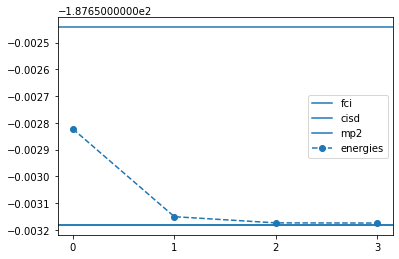

In [9]:
result.history.plot("energies", baselines={"fci":fci, "cisd": cisd, "mp2":mp2}, filename="CO2_result_bfgs")